
# Bokeh for Time Series Analysis
<hr style="border: 2px solid black;">


<img src="./images/bokeh.png" alt="bokeh Logo" width="1000"/>
<hr style="border: 2px solid black;">

<img src="./images/bokeh_at_ag_glance.png" alt="bokeh Logo" width="1000"/>
<hr style="border: 2px solid black;">
**Introduction to Bokeh**
Bokeh is an interactive visualization library for Python that targets modern web browsers for presentation.
Unlike Matplotlib, which is primarily designed for static plots, Bokeh excels at creating
interactive plots and dashboards. It can handle large datasets and streaming data,
making it suitable for real-time applications.

**Key Features of Bokeh:**

* **Interactivity:** Built-in support for zooming, panning, hovering, and other interactive tools.
* **Web-Focused:** Generates HTML and JavaScript, making it easy to embed plots in web pages.
* **High Performance:** Can handle large datasets efficiently.
* **Versatility:** Supports a wide range of plot types (lines, bars, scatter plots, etc.).

<hr style="border: 2px solid black;">


**Documentation:**

For comprehensive documentation, please refer to the official Bokeh website: [https://docs.bokeh.org/en/latest/](https://docs.bokeh.org/en/latest/)


<hr style="border: 2px solid black;">


**Lab Exercise:**

Your task is to recreate the time series analysis lab we previously conducted using Pandas,
Matplotlib, and Seaborn, but this time, utilize the Bokeh library for visualization.
This will involve:

1.  Loading and preprocessing the "AirPassengersDates.csv" dataset.
2.  Creating interactive Bokeh plots for:
    * Time series line plots
    * Bar plots of aggregated data
    * Visualizing mean and standard deviation
    * Outlier detection
    * Resampling (upsampling and downsampling)
    * Lag analysis
    * Autocorrelation

Pay close attention to Bokeh's features for interactivity (tools, hover effects) and
its handling of data sources. Aim to replicate the insights and visualizations
from the previous lab while leveraging Bokeh's strengths.

Good luck!
<hr style="border: 2px solid black;">

In [15]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Title, Span, Label
from pathlib import Path

In [16]:
output_notebook()

# Set the data path
DATA_PATH = Path(".")  

# 2. Load the Dataset
passenger_df = pd.read_csv("./datasets/AirPassengersDates.csv")

print(passenger_df.head())
print(passenger_df.info())


Loading BokehJS ...

         Date  #Passengers
0  1949-01-12          112
1  1949-02-24          118
2  1949-03-22          132
3   1949-04-5          129
4  1949-05-24          121
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


In [17]:
#1.  Convert to Datetime
passenger_df["Date"] = pd.to_datetime(passenger_df["Date"])
print(passenger_df.info())

#2. Extract components
passenger_df["Month"] = passenger_df["Date"].dt.month
passenger_df["Day"] = passenger_df["Date"].dt.day
passenger_df["Day_Name"] = passenger_df["Date"].dt.day_name()

print(passenger_df.head())

# Section 3: Time Series Visualization and Analysis (Bokeh Version)

# ColumnDataSource --> necessary for graphs 
source = ColumnDataSource(passenger_df)

# Create a graph
p=figure(title = "Air passengers over time", x_axis_label ="Date", y_axis_label= "Passengers", x_axis_type= "datetime", width = 800, height=400)
# blue line
p.line(x="Dta", y="#Passengers", source = source, line_width=2, line_color = "blue")
p.circle(x='Date', y ="#Passengers", source=source, size=6, color="red")
show(p)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None
        Date  #Passengers  Month  Day   Day_Name
0 1949-01-12          112      1   12  Wednesday
1 1949-02-24          118      2   24   Thursday
2 1949-03-22          132      3   22    Tuesday
3 1949-04-05          129      4    5    Tuesday
4 1949-05-24          121      5   24    Tuesday


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : x='Dta' [closest match: 'Day'] {renderer: GlyphRenderer(id='p1752', ...)}


In [18]:
# 2. Aggregation and Bar Plot

passengers_per_month = (
    passenger_df.groupby("Month")["#Passengers"].sum().reset_index()
)

p= figure(title = "Total passengers per month", x_axis_label = "Date", y_axis_label = "Passengers", width = 600, height = 400)
p.vbar(x= "Month", top ="#Passengers", width = 0.8, color="orange" ,source = ColumnDataSource (passengers_per_month))
show(p)

In [19]:
# 3. Mean and Standard Deviation
mean_passengers = passenger_df["#Passengers"].mean()
std_passengers = passenger_df["#Passengers"].std()

# Création du plot
p = figure( title="Passengers with Mean and Standard Deviation", x_axis_type="datetime", width=800, height=400, tools="pan,wheel_zoom,box_zoom,reset")

main_line = p.line( x="Date",y="#Passengers", source=ColumnDataSource(passenger_df), line_width=2, legend_label="Passengers", color="blue")

p.line(x=passenger_df["Date"], y=[mean_passengers]*len(passenger_df), line_color="red", line_dash="dashed", line_width=2, legend_label=f"Mean: {mean_passengers:.2f}")

p.line( x=passenger_df["Date"], y=[mean_passengers + std_passengers]*len(passenger_df), line_color="green", line_dash="dashed", line_width=1.5, legend_label=f"+1 Std: {std_passengers:.2f}")

p.line( x=passenger_df["Date"], y=[mean_passengers - std_passengers]*len(passenger_df), line_color="green", line_dash="dashed", line_width=1.5, legend_label=f"-1 Std: {std_passengers:.2f}")

#span -> equivalent de axhline
mean_span = Span( location=mean_passengers,dimension='width',line_color="red",line_dash="dashed",line_width=2)
p.add_layout(mean_span)

std_span_upper = Span( location=mean_passengers + std_passengers, dimension='width',line_color="green",line_dash="dashed",line_width=1.5)
p.add_layout(std_span_upper)

std_span_lower = Span(location=mean_passengers - std_passengers,dimension='width',line_color="green",line_dash="dashed",line_width=1.5)
p.add_layout(std_span_lower)

# Style
p.legend.location = "top_left"
p.grid.grid_line_alpha = 0.3
p.xaxis.axis_label = "Date"
p.yaxis.axis_label = "Number of Passengers"

show(p)


In [20]:
# Section 4: Outlier Detection
from bokeh.models import ColumnDataSource, Whisker, LabelSet

# 1. Z-Score Calculation 
passenger_df["Z-Score"] = (passenger_df["#Passengers"] - passenger_df["#Passengers"].mean()) / passenger_df["#Passengers"].std()
passenger_df["Absolute_Z-Score"] = abs(passenger_df["Z-Score"])

# Tri des valeurs 
print(passenger_df.sort_values(by="Absolute_Z-Score", ascending=False).head(10))

          Date  #Passengers  Month  Day   Day_Name   Z-Score  Absolute_Z-Score
138 1960-07-02          622      7    2   Saturday  2.848311          2.848311
139 1960-08-16          606      8   16    Tuesday  2.714940          2.714940
127 1959-08-01          559      8    1   Saturday  2.323164          2.323164
126 1959-07-29          548      7   29  Wednesday  2.231471          2.231471
137 1960-06-02          535      6    2   Thursday  2.123108          2.123108
140 1960-09-14          508      9   14  Wednesday  1.898044          1.898044
115 1958-08-18          505      8   18     Monday  1.873037          1.873037
114 1958-07-13          491      7   13     Sunday  1.756338          1.756338
136 1960-05-27          472      5   27     Friday  1.597960          1.597960
125 1959-06-24          472      6   24  Wednesday  1.597960          1.597960


In [21]:
# 2. Outlier Visualization
outliers = passenger_df[(passenger_df["Absolute_Z-Score"] > 2)] 

p = figure(title="Air Passengers with Outliers", x_axis_type="datetime", width=600, height=400)
p.line(x="Date", y="#Passengers", source=ColumnDataSource(passenger_df), line_width=1)

# Points outliers eq plt.scatter)
p.circle(x="Date", y="#Passengers", source=ColumnDataSource(outliers), color="red", size=6)

show(p)

In [22]:
# Section 5: Resampling ( changing the frequency)

passenger_df.set_index("Date", inplace=True)
daily_passengers = passenger_df.resample('D').asfreq()
daily_passengers['#Passengers'] = daily_passengers['#Passengers'].interpolate(method='linear')

p = figure( title="Upsampling to Daily Frequency", x_axis_type="datetime", width=600, height=400
)

p.line(x=passenger_df.index, y=passenger_df['#Passengers'], line_width=1, alpha=0.7)
p.line(x=daily_passengers.index, y=daily_passengers['#Passengers'], line_width=1, line_dash='dashed')

show(p)

In [23]:
#2. Downsampling
yearly_passengers = passenger_df.resample("Y")["#Passengers"].mean()
p = figure( title="Downsampling to Yearly Frequency", x_axis_type="datetime", width=600, height=400)

p.line( x=passenger_df.index, y=passenger_df["#Passengers"], alpha=0.5)

p.circle(x=yearly_passengers.index, y=yearly_passengers, size=8)

show(p)

C:\Users\user\AppData\Local\Temp\ipykernel_2832\3375238555.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_passengers = passenger_df.resample("Y")["#Passengers"].mean()


In [24]:
# Section 6: Shift and tshift (Bokeh Minimal)

passenger_df["#Passengers_Shift"] = passenger_df["#Passengers"].shift(periods=1)
passenger_df["#Passengers_tShift"] = passenger_df["#Passengers"].shift(periods=1, freq="MS")

print(passenger_df.head())

p = figure(title="Shift vs tShift", x_axis_type="datetime", width=600, height=400)

p.line(x="Date", y="#Passengers",source=ColumnDataSource(passenger_df), legend_label="Original")

p.line(x="Date", y="#Passengers_Shift", source=ColumnDataSource(passenger_df), line_color="orange",legend_label="Shifted")

p.line( x="Date",y="#Passengers_tShift",source=ColumnDataSource(passenger_df),line_color="green", legend_label="tShifted")

show(p)

            #Passengers  Month  Day   Day_Name   Z-Score  Absolute_Z-Score  \
Date                                                                         
1949-01-12          112      1   12  Wednesday -1.402882          1.402882   
1949-02-24          118      2   24   Thursday -1.352868          1.352868   
1949-03-22          132      3   22    Tuesday -1.236169          1.236169   
1949-04-05          129      4    5    Tuesday -1.261176          1.261176   
1949-05-24          121      5   24    Tuesday -1.327861          1.327861   

            #Passengers_Shift  #Passengers_tShift  
Date                                               
1949-01-12                NaN                 NaN  
1949-02-24              112.0                 NaN  
1949-03-22              118.0                 NaN  
1949-04-05              132.0                 NaN  
1949-05-24              129.0                 NaN  


NameError: name 'acf' is not defined

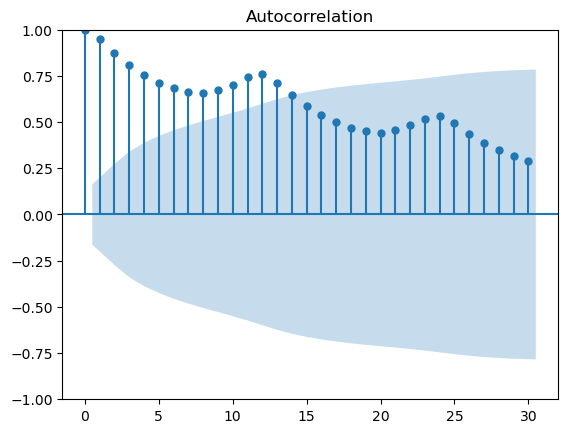

In [25]:
# Section 7: Autocorrelation (Bokeh Minimal - Sans premier graphique)

from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# 1. Calcul ACF (identique)
fig = plot_acf(passenger_df["#Passengers"], lags=30)

# 2. Extraction des données ACF 
lags = np.arange(30)  
acf_values = fig.axes[0].lines[1].get_ydata()[1:]

acf_values = acf(passenger_df["#Passengers"], nlags=30)
lags = np.arange(31)  # Inclut le lag 0

p = figure(title="Autocorrelation Function (ACF)", width=600, height=400, x_axis_label="Lag", y_axis_label="Autocorrelation", tools="")  

# Barres ACF (à partir du lag 1)
p.vbar(x=lags[1:], top=acf_values, width=0.8, color="steelblue")

# Ligne de référence y=0
p.line( x=[0, 30], y=[0, 0], line_color="black")



show(p)